In [130]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.utils import shuffle
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve


In [131]:
#Import Censored Data
censored_df=pd.read_csv('censored_tweets.csv')
censored_df = pd.DataFrame(censored_df)
censored_df.insert(loc=3, column='y', value=0)
censored_df = censored_df.drop(['id','lang'],axis=1)

In [132]:
#import regular tweets
uncensored_df=pd.read_csv('regular_tweets.csv')
uncensored_df = pd.DataFrame(uncensored_df)
uncensored_df.insert(loc=3, column='y', value=1)
uncensored_df = uncensored_df.drop(['id','lang'],axis=1)

In [133]:
#merge and shufflem
df = pd.concat([censored_df, uncensored_df], ignore_index=True, sort=False)
df = shuffle(df)

In [135]:
df_x=df["text"]
df_y=df["y"]

In [136]:
x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=4)

In [137]:
cv = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

x_traincv=cv.fit_transform(x_train)
x_testcv=cv.transform(x_test)
x_traincv.shape

(3110, 14350)

In [138]:
y_train=y_train.astype('int')
y_test=y_test.astype('int')

In [139]:
log_reg = LogisticRegression()

In [140]:
log_reg.fit(x_traincv, y_train)

LogisticRegression()

In [141]:
predictions=log_reg.predict(x_testcv)

In [142]:
confusion_matrix(y_test, predictions)

array([[285,  74],
       [ 67, 352]], dtype=int64)

In [143]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.79      0.80       359
           1       0.83      0.84      0.83       419

    accuracy                           0.82       778
   macro avg       0.82      0.82      0.82       778
weighted avg       0.82      0.82      0.82       778



In [144]:
log_reg.score(x_testcv, y_test)

0.8187660668380463

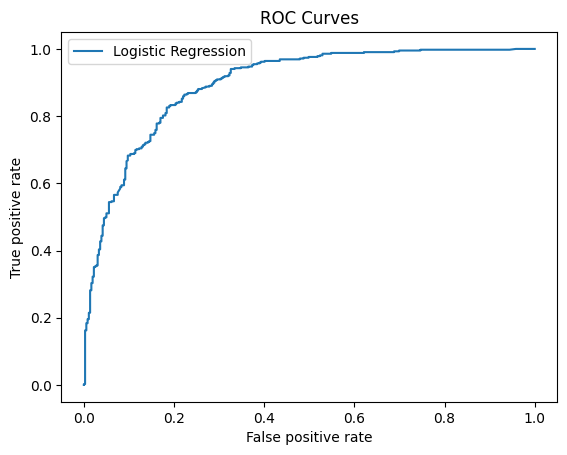

In [145]:
scores = log_reg.predict_proba(x_testcv)
fpr, tpr, _ = roc_curve(y_test, scores[:, 1])
plt.plot(fpr, tpr)

#Plot
plt.title('ROC Curves')
plt.xlabel('False positive rate'); plt.ylabel('True positive rate')
plt.legend(['Logistic Regression'])
plt.show()